# Exploratory Time Series Data Analysis
This project focuses on the Exploratory Data Analysis of a time series file. Time series refers to the data that is sequentially collected over time. Various components usually contribute to any observed time series value at any particular point in time.


## Libraries, directory and data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Time Series Forecasting Product

[Errno 2] No such file or directory: '/content/drive/MyDrive/Time Series Forecasting Product'
/content


In [3]:
#libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf
import matplotlib.pyplot as plt


In [5]:
#load the data
#YYYY-MM-DD
df = pd.read_csv('/content/drive/MyDrive/Time Series/nyc_data.csv', index_col = 0, parse_dates = True)
df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


In [6]:
#Rename variable
df = df.rename(columns = {'Demand': 'y'})
df.head(0)

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,


##Data Analysis

In [7]:
#Summary statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
y,2192.0,756.059227,152.143070,425.77532,641.161123,736.94763,855.645886,1384.908525
Easter,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Thanksgiving,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Christmas,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Temperature,2192.0,15.012655,8.772751,-8.85000,7.767500,14.89500,23.230000,30.900000
Marketing,2192.0,126.675890,58.274047,24.58900,78.303500,122.76450,169.395250,299.860000


## Seasonal Decomposition

Time series decomposition is the process of separating time series data into its core components. The interpretation of the components is also very intuitive:

- `Trend` — the general direction of the series over a long period of time
- `Seasonality` — a distinct, repeating pattern observed in regular intervals due to various seasonal factors. Could be monthly, weekly, etc.
- `Residual` — the irregular component consisting of the fluctuations in the time series after removing the previous components


There are two techniques for combining time series components:

- **Additive:** The term additive means individual components (trend, seasonality, and residual) are added together. An additive trend indicates a linear trend, and an additive seasonality indicates the same frequency (width) and amplitude (height) of seasonal cycles.
- **Multiplicative:** The term multiplicative means individual components (trend, seasonality, and residuals) are multiplied together. A multiplicative trend indicates a non-linear trend (curved trend line), and a multiplicative seasonality indicates increasing/decreasing frequency (width) and/or amplitude (height) of seasonal cycles.

Both trend and seasonality can be additive or multiplicative, which means there are four ways these can be combined:

- Additive trend and additive seasonality
- Additive trend and multiplicative seasonality
- Multiplicative trend and additive seasonality
- Multiplicative trend and multiplicative seasonality



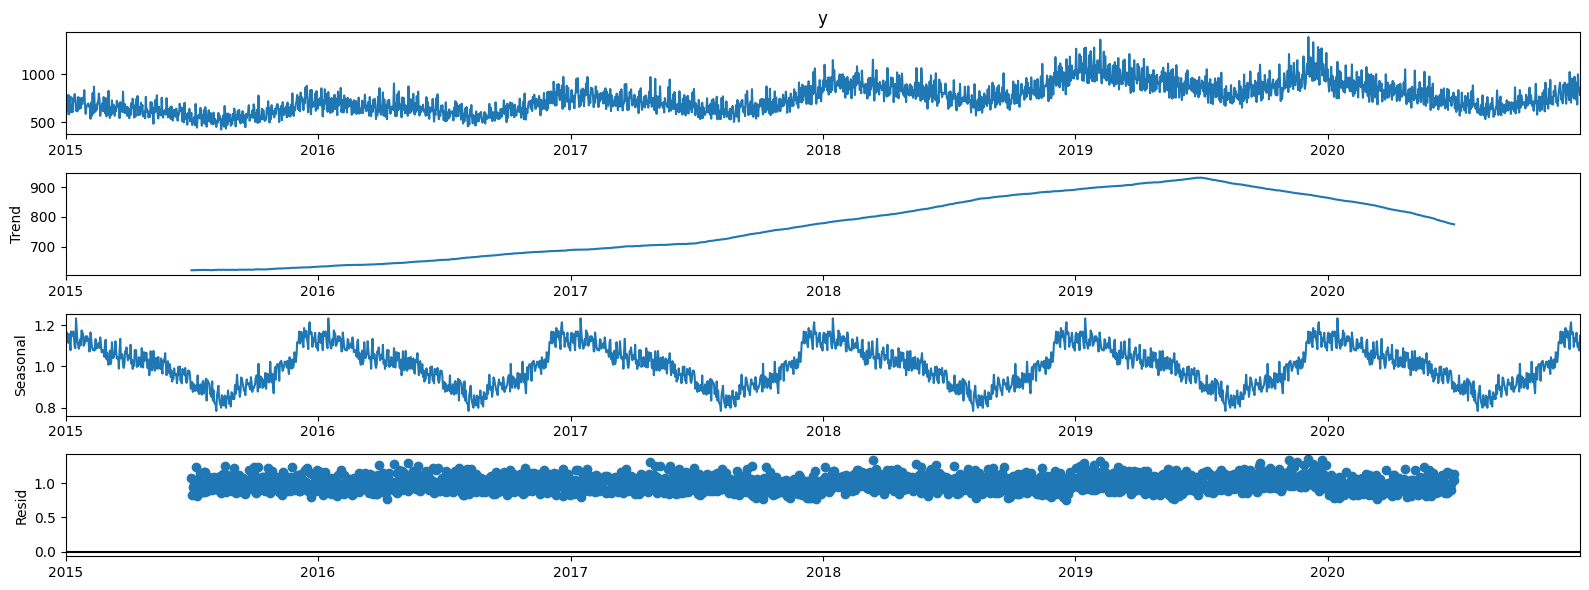

In [19]:
#decomposition
decomposition = seasonal_decompose(x = df.y,
                                   model = 'multiplicative',
                                   period = 365)
decomposition.plot();

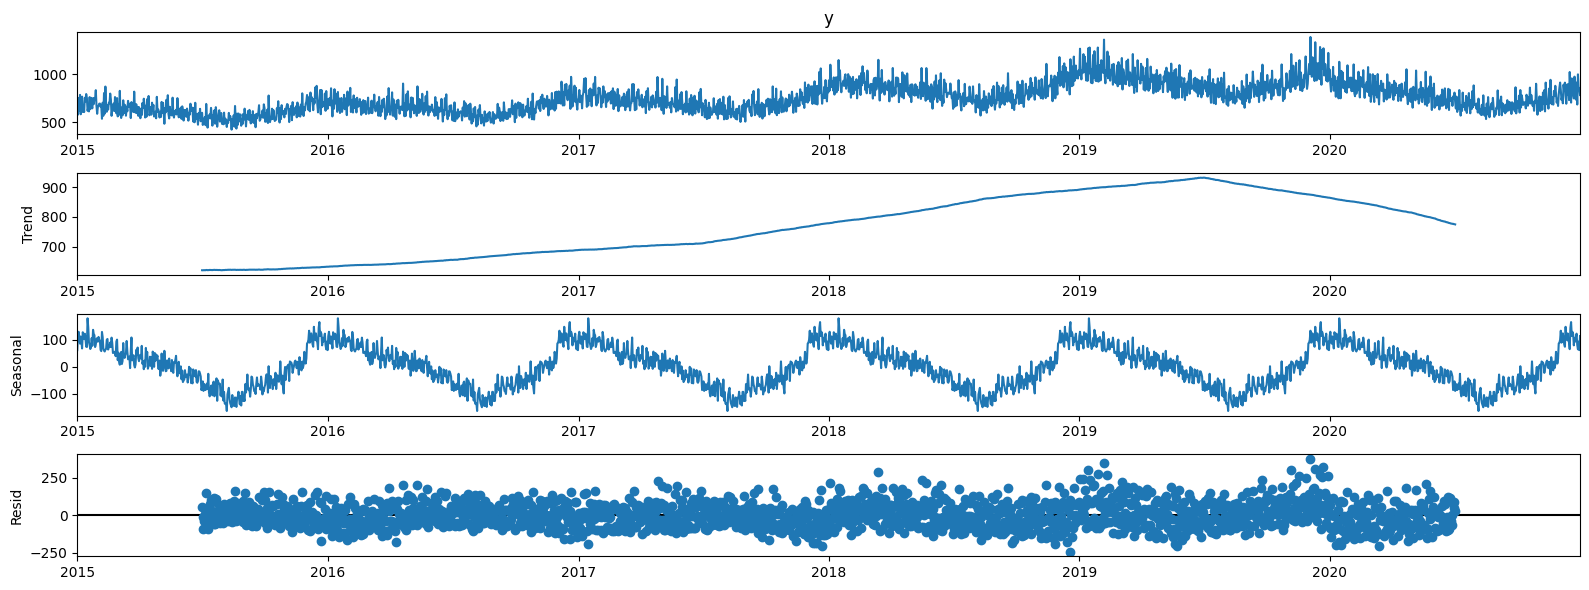

In [18]:
#decomposition
decomposition = seasonal_decompose(x = df.y,
                                   model = 'additive',
                                   period = 365)
decomposition.plot();

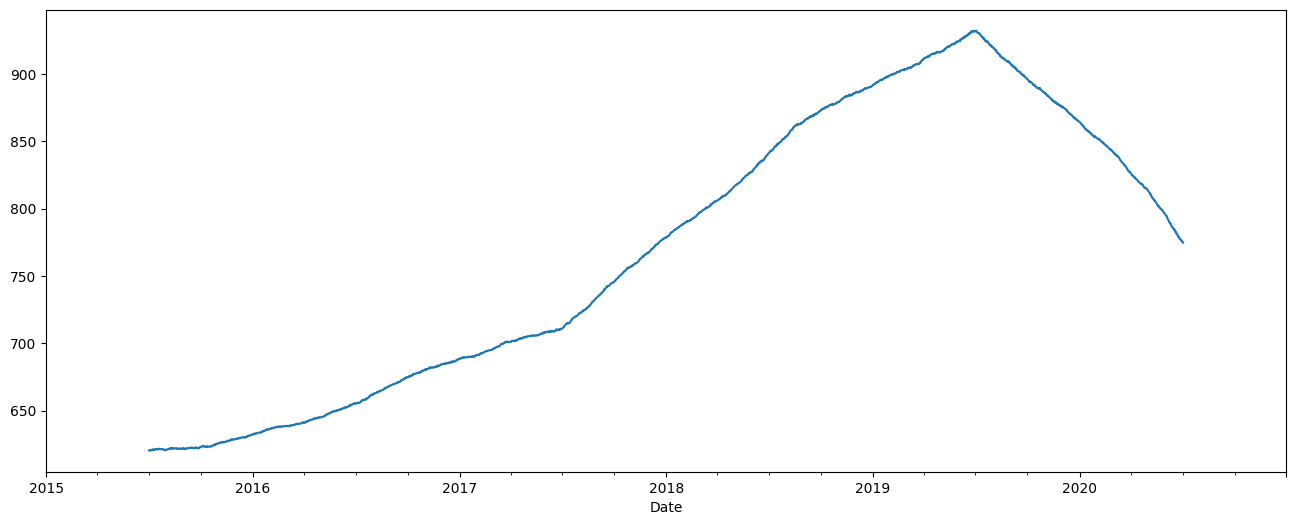

In [17]:
#plotting
decomposition.trend.plot();

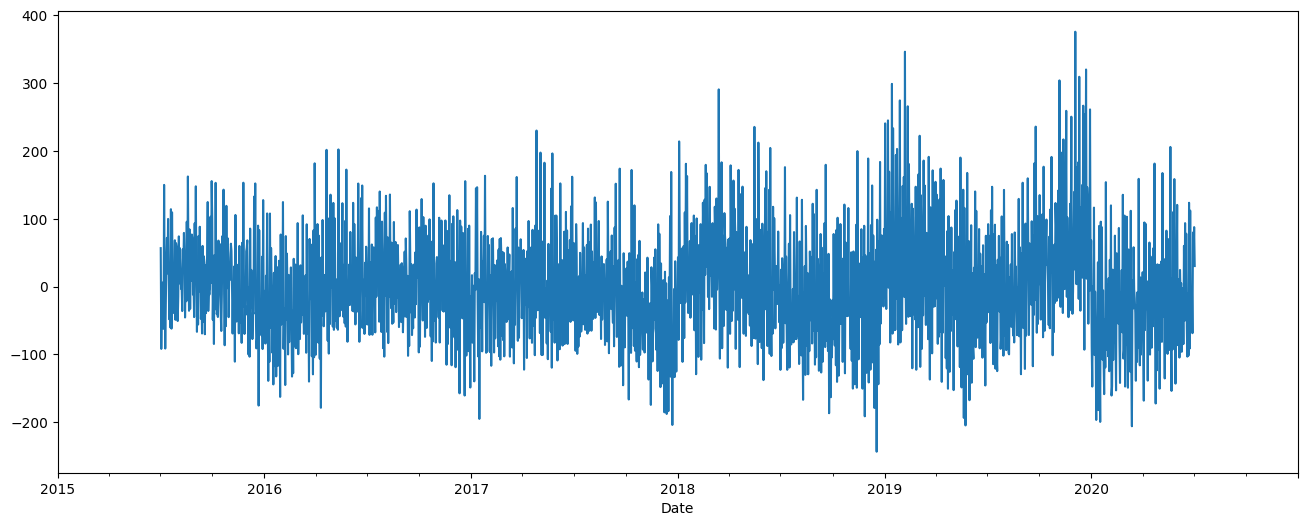

In [16]:
#plotting
decomposition.resid.plot();

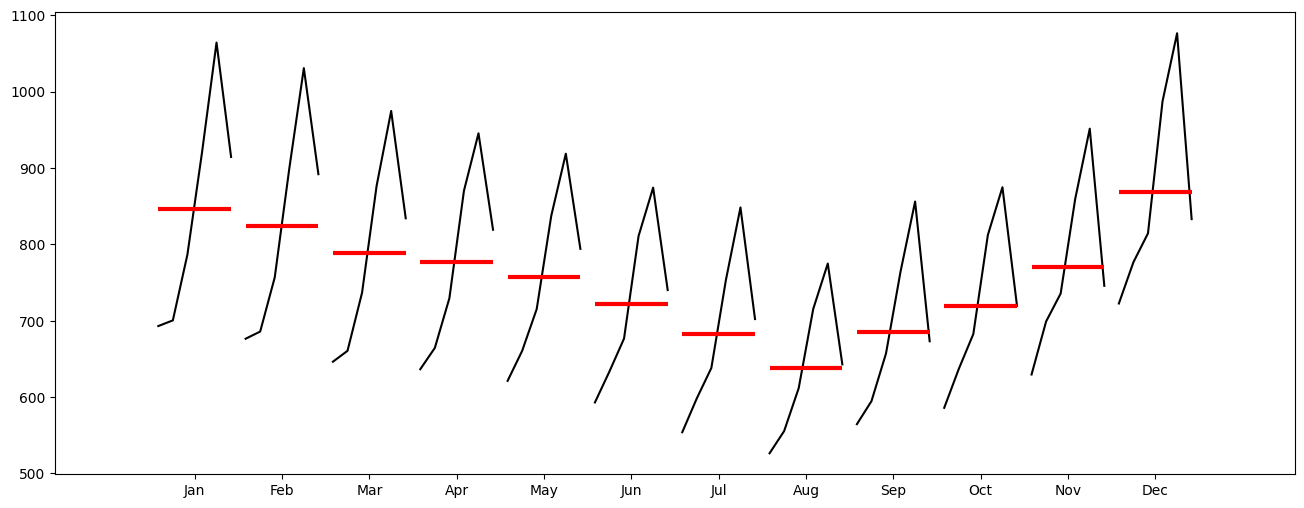

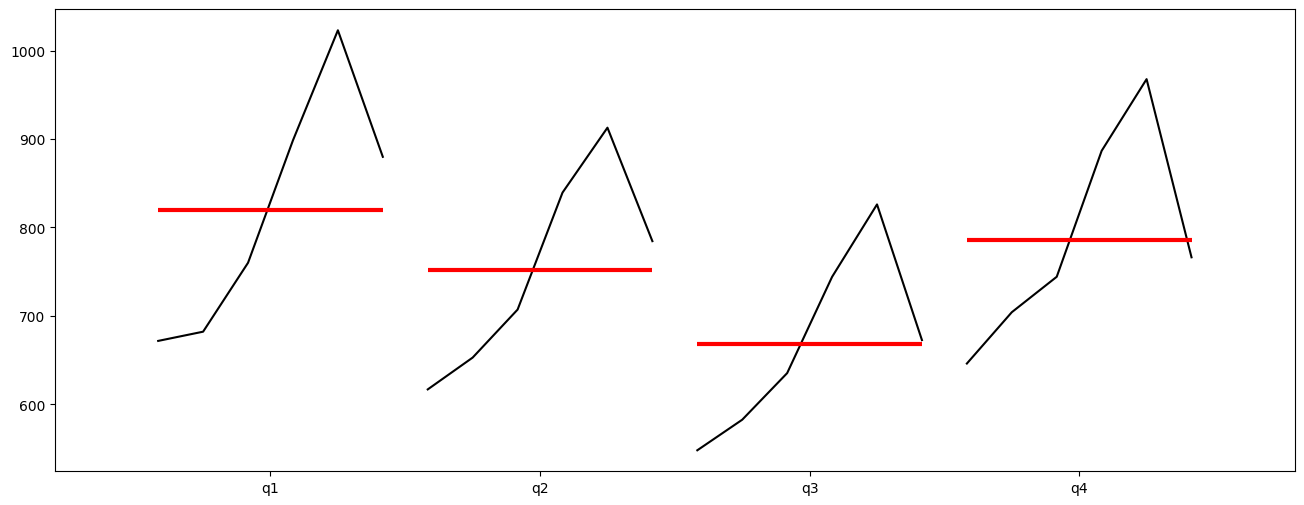

In [20]:
#Seasonal graphs
month_plot(df.y.resample(rule = 'MS').mean());
quarter_plot(df.y.resample(rule = 'Q').mean());

In [12]:
#Aggregating on specific time frame
df.y.resample(rule = 'MS').mean()

Date
2015-01-01    692.967611
2015-02-01    676.381042
2015-03-01    646.326069
2015-04-01    636.463333
2015-05-01    621.211624
                 ...    
2020-08-01    642.785119
2020-09-01    673.093698
2020-10-01    719.514838
2020-11-01    745.599826
2020-12-01    832.963040
Freq: MS, Name: y, Length: 72, dtype: float64

## Advanced Visualization

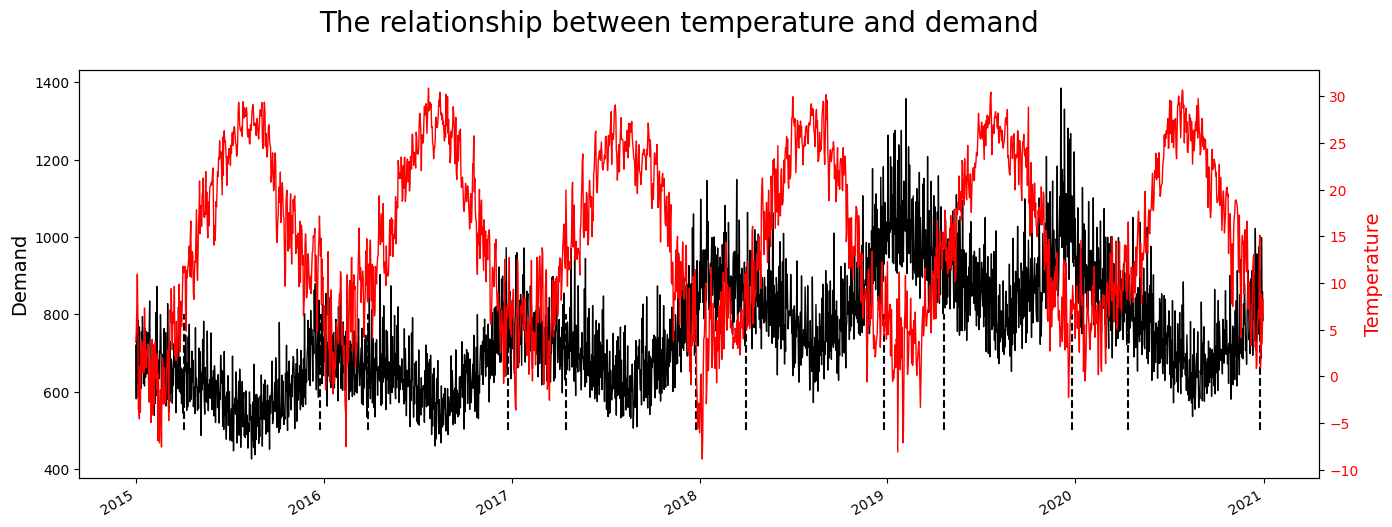

In [27]:
#Create a version B of the dataframe
df_plot = df.loc['2015-01-01':'2020-12-31']

#Define the colors
temp_color = 'red'
y_color = 'black'

#plot
fig, ax1 = plt.subplots(figsize = (16,6))
ax2 = ax1.twinx()

#Data and Lines
ax1.plot(df_plot.index, df_plot.y, color = y_color, lw = 1)
ax2.plot(df_plot.index, df_plot.Temperature, color = temp_color, lw = 1)

#Title and dates
fig.suptitle("The relationship between temperature and demand", fontsize = 20)
fig.autofmt_xdate()

#first axis
ax1.set_label("Date")
ax1.tick_params(axis = "y", labelcolor = y_color)
ax1.set_ylabel("Demand", color = y_color, fontsize = 14)

#second axis
ax2.tick_params(axis = "y", labelcolor = temp_color)
ax2.set_ylabel("Temperature", color = temp_color, fontsize = 14)

#Add holidays or events
events = df_plot[(df_plot.Easter == 1) | (df_plot.Christmas == 1)].index
ax1.vlines(x = events, ymin = 500, ymax = 800, color = 'k', ls = '--')
plt.show()

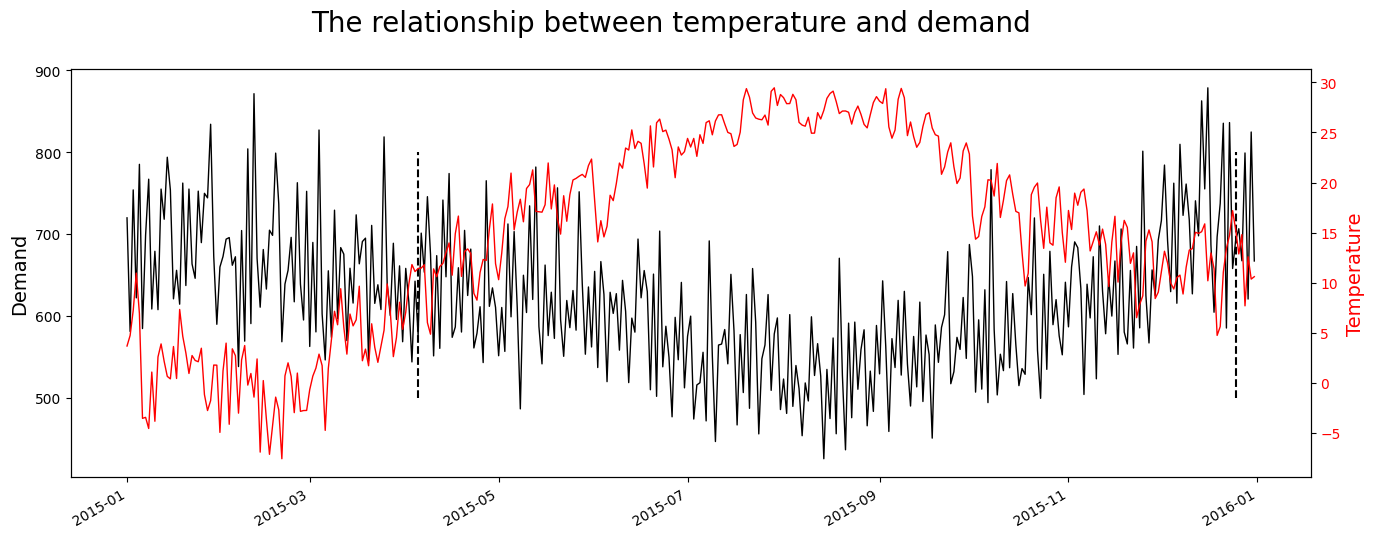

In [25]:
#Create a version B of the dataframe
df_plot = df.loc['2015-01-01':'2015-12-31']

#Define the colors
temp_color = 'red'
y_color = 'black'

#plot
fig, ax1 = plt.subplots(figsize = (16,6))
ax2 = ax1.twinx()

#Data and Lines
ax1.plot(df_plot.index, df_plot.y, color = y_color, lw = 1)
ax2.plot(df_plot.index, df_plot.Temperature, color = temp_color, lw = 1)

#Title and dates
fig.suptitle("The relationship between temperature and demand", fontsize = 20)
fig.autofmt_xdate()

#first axis
ax1.set_label("Date")
ax1.tick_params(axis = "y", labelcolor = y_color)
ax1.set_ylabel("Demand", color = y_color, fontsize = 14)

#second axis
ax2.tick_params(axis = "y", labelcolor = temp_color)
ax2.set_ylabel("Temperature", color = temp_color, fontsize = 14)

#Add holidays or events
events = df_plot[(df_plot.Easter == 1) | (df_plot.Christmas == 1)].index
ax1.vlines(x = events, ymin = 500, ymax = 800, color = 'k', ls = '--')
plt.show()

In [14]:
#correlation
df[['y', 'Temperature', 'Marketing']].corr()

,y,Temperature,Marketing
y,1.000000,-0.400261,0.275139
Temperature,-0.400261,1.000000,-0.185626
Marketing,0.275139,-0.185626,1.000000


## Autocorrelation Plot
An autocorrelation plot shows the properties of a type of data known as a time series. A time series refers to observations of a single variable over a specified time horizon.

An autocorrelation plot is designed to show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other. (The prefix auto means "self"— autocorrelation specifically refers to correlation among the elements of a time series.)

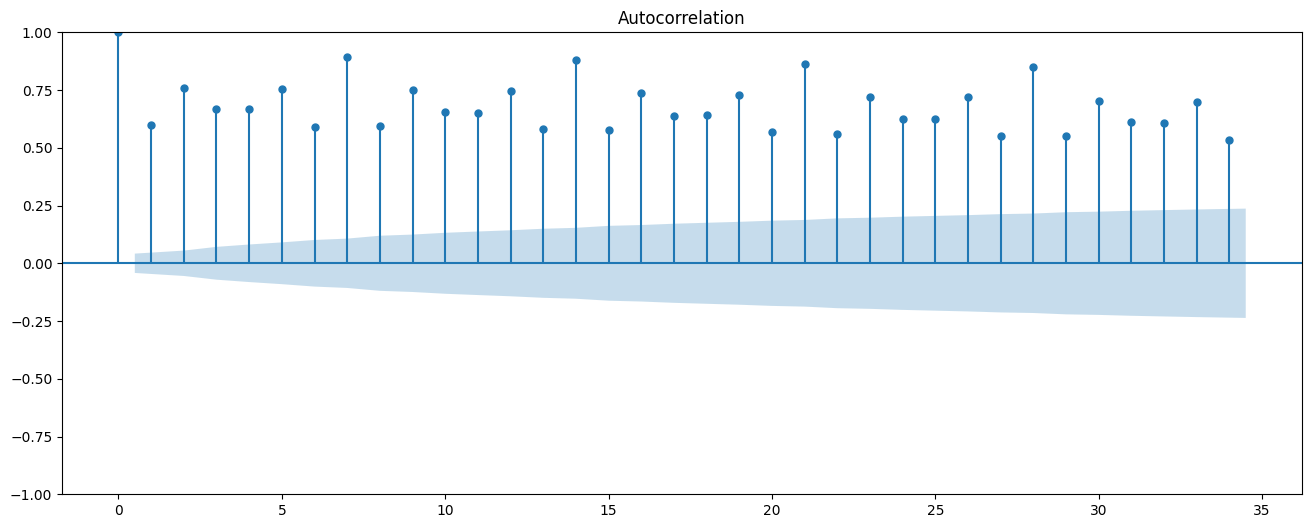

In [15]:
#ACF plot
plt.rcParams["figure.figsize"] = (16,6)
plot_acf(df.y)
plt.show();

Correlation is high which means we have information in the past.